In [165]:
# standard libraries 
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from tueplots import axes, bundles , figsizes, fonts,fontsizes
import seaborn as sns
import random 
from random import randrange

In [166]:
# statistics 
import statsmodels.api as sm
from scipy import stats as stat
from sklearn.inspection import partial_dependence
from sklearn.utils import resample
from scipy.stats import sem
from statsmodels.graphics.regressionplots import plot_partregress

In [167]:
# ML models
from sklearn import tree  # Classification tree        
from xgboost import XGBClassifier # xgboost 
from sklearn.ensemble import RandomForestClassifier # Random forest 

In [168]:
from imblearn.combine import SMOTEENN # data augmentation 
from sklearn.utils import shuffle
from sklearn.inspection import PartialDependenceDisplay

# read in data 

In [169]:
nsw = pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/NswLalonde_transformed.csv') # RCT
nswre74 = pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/NswDeWab_transformed.csv') # RCT 
nswCps_lalonde =  pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswCps_lalonde.csv') # Quasi data 
nswPsid_lalonde = pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswPsid_lalonde.csv') # Quasi data 
nswCps_dehWab =   pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswCps_dehWab.csv') # Quasi data 
nswPsid_dehWab =  pd.read_csv('/Users/mawuliagamah/gitprojects/causal_inference/causal_inference/datasets/quasi data/unmatched data/Quasi_NswPsid_dehWab.csv') # Quasi data 

<p> scatter plot's </p>

/Users/mawuliagamah/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mawuliagamah/opt/anaconda3/lib/python3.8/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


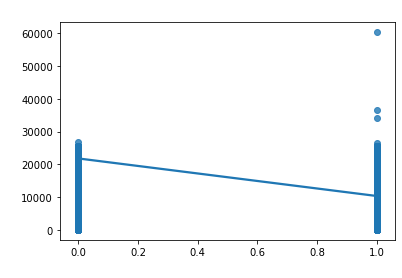

In [170]:
sns.regplot(nswCps_lalonde['black'], nswCps_lalonde['re78'], lowess=True)
plt.ylabel(' ')
plt.xlabel(' ')
plt.title(' ')
plt.show()

<p> building block 1 </p>


plot = PartialDependenceDisplay.from_estimator(**pdp_params,response_method = "predict_proba")

pdp_params = {"estimator":boostestedTree,
               "features":plot_features,
                "X":features,
                "feature_names":plot_features }

target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)

features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)

hyper_parameter_ict = {"objective":"binary:logistic","seed":0,
                       "booster":"dart", "colsample_bytree":0.3,
                         "gamma":0.5, "learning_rate" : 0.05,
                           "max_depth":None, "min_child_weight":2,
                      "subsample":0.5, "nthread":4 }
plot_features = ['treat','age','education*','black','hispanic','married','nodegree','re75']


target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)

<p> building block 2  </p>

def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;


target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)


def fitandRunModelfunct(hyper_parameter_ict,features,target):

        model = XGBClassifier(**hyper_parameter_ict).fit(features,target)  # unpack dictionary 

        return model


model = fitandRunModelfunct(hyper_parameter_ict,features,target)

def partialdependenceplotfunct(model,features,feature_string, target_string):

        

        x_values = np.linspace(np.min(features[feature_string]), np.max(features[feature_string]))

        pdp_values = []
        for n in x_values:
            X_pdp = features.copy()
            X_pdp[feature_string] = n
            pdp_values.append(np.mean(model.predict(X_pdp)))

        plt.plot(x_values, pdp_values)
        plt.ylabel(target_string)
        plt.xlabel(feature_string)
        plt.title('Partial dependence plot for treated vs boosted tree')
        plt.show()

        return plot

feature_string = "education*"
target_string = "treat"
partialdependenceplotfunct(model,features,feature_string,target_string)       

boostestedTree = XGBClassifier(hyper_parameter_ict).fit(features,target)  # unpack dictionary 

def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;


target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = dataset(target_variable,covariateSelection1,nswCps_lalonde)


boostestedTree = XGBClassifier(**hyper_parameter_ict).fit(features,target)  # unpack dictionary 

x_values = np.linspace(np.min(features['age']), np.max(features['age']))
pdp_values = []
for n in x_values:
  X_pdp = features.copy()
  X_pdp['age'] = n
  pdp_values.append(np.mean(boostestedTree.predict(X_pdp)))

plt.plot(x_values, pdp_values)
plt.ylabel('treated')
plt.xlabel('age')
plt.title('Partial dependence plot for treated vs boosted tree')
plt.show()

pdp_values

# WIP BOOTSTRAPPED partial dependence plot

n_bootstrap = 100

nox_values = np.linspace(np.min(X['NOX']), np.max(X['NOX']))

expected_value_bootstrap_replications = []

for _ in range(n_bootstrap):
    X_boot, y_boot = resample(X, y)
    rf_model_boot = RandomForestRegressor(n_estimators=100).fit(X_boot, y_boot)
    
    bootstrap_model_predictions = []
    for n in nox_values:
        X_pdp = X_boot.copy()
        X_pdp['NOX'] = n
        bootstrap_model_predictions.append(np.mean(rf_model.predict(X_pdp)))
    expected_value_bootstrap_replications.append(bootstrap_model_predictions)
    
expected_value_bootstrap_replications = np.array(expected_value_bootstrap_replications)
for ev in expected_value_bootstrap_replications:
    plt.plot(nox_values, ev, color='blue', alpha=.1)

prediction_se = np.std(expected_value_bootstrap_replications, axis=0)

plt.plot(nox_values, pdp_values, label='Model predictions')
plt.fill_between(nox_values, pdp_values - 3*prediction_se, pdp_values + 3*prediction_se, alpha=.5, label='Bootstrap CI')
plt.legend()
plt.ylabel('Median house price')
plt.xlabel('NOX')
plt.title('Partial dependence plot for NOX vs Price for Random Forest')
plt.show()

plot.figure_.suptitle(
    "Partial dependence plt"
)
plot.figure_.subplots_adjust(hspace=0.3)


plt.rcParams.update({"figure.dpi": 300}) 
plt.rcParams.update(bundles.neurips2022())
plt.rcParams.update(fonts.neurips2022())
plt.rcParams.update(axes.tick_direction( y="in"))
plt.rcParams.update(axes.color(base="black"))
plt.rcParams.update(figsizes.neurips2022(nrows=1, ncols=1))
plt.rcParams.update({'font.size': 18})

In [ ]:

hyper_parameter_ict = {"objective":"binary:logistic","seed":0,
                       "booster":"dart", "colsample_bytree":0.3,
                         "gamma":0.5, "learning_rate" : 0.05,
                           "max_depth":None, "min_child_weight":2,
                      "subsample":0.5, "nthread":4 }


# models 

# Function called fit model 
# def fitandRunModelfunct():
#  probabilities = model.predict_proba(dataset.drop('treat', axis=1))

# plotting function
#from sklearn import tree
#import graphviz
#tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
#graphviz.Source(tree_graph)

    #@classmethod
    #def variables_to_plot(self,features_string,target_string):
        #dataset = shuffle(self.dataset).reset_index(drop=True) # shuffle data 
    #    self.features_str = features_string
    #    self.target_str = target_string
    #    return self.features_str,self.target_str


def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;

target_variable = "treat"
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75']
features,target = features_and_targets_function(target_variable,covariateSelection1,nswCps_lalonde)

In [ ]:
# Load classifiers 

In [144]:
class explainer(object):
    """
    explainer class takes in a model, dataset, list of covariates, list of targets and feature and target to plot 
    """
    # Class attribute
    def __init__(self,model,dataset,covariates,target,xy_list): # initialise class 
                  #bootstrap true false           
        super(explainer, self).__init__() 
        self.model = model
        self.dataset = shuffle(dataset).reset_index(drop=True) # shuffle data
        self.features = dataset[covariates]
        self.target = dataset[target]
        self.features_str = xy_list[0]
        self.target_str = xy_list[1]
        
    """
    create partial dependence plot
    """    
    
    def partialDependPlot(self,ax):
        x_values = np.linspace(np.min(self.features[self.features_str]), np.max(self.features[self.features_str])) # x-range for the feature
        pdp_values = []
        for n in x_values:
            X_pdp = self.features.copy()
            X_pdp[self.features_str] = n
            pdp_values.append(np.mean(self.model.predict(X_pdp)))  
        ax = ax
        ax.plot(x_values, pdp_values)
        ax.set_ylabel(self.target_str)
        ax.set_xlabel(self.features_str)
        ax.set_title('Partial dependence plot for treated vs boosted tree')
        return ax
    
    # def plotTree(ax)






In [140]:
def features_and_targets_function(target,features,dataset):
        """
        Split dataset into features and targets 
        """
        dataset = shuffle(dataset).reset_index(drop=True) # shuffle data 
        target = dataset[target]
        features = dataset[features]
        return features,target;



<p> KEY </p>
<p> 1 - nsw treated + CPS control  (Lalonde's original sample) </p>
<p> 2 - nsw treated + PSID control (Lalonde's original sample) </p>
<p> 3 - nsw treated + CPS control  (Dehejia & Wahba sub-sample) </p>
<p> 4 - nsw treated + PSID control (Dehejia & Wahba sub-sample) </p>

# Fit all tree based models 

In [171]:
# Features and Tarfets 
target_variable = "treat" # target 
covariateSelection1 = ['treat','age','education*','black','hispanic','married','nodegree','re75'] # features 

# features and target function to split dataset up ( this could go into the explainer class)
features,target = features_and_targets_function(target_variable,covariateSelection1,nswCps_lalonde) 

# Hyper parameters ( taken from grid search)

# CART
cart_hyper_params1 = {"random_state":0,"criterion":'entropy',
                        "max_depth":5,"max_leaf_nodes":12,
                      "min_samples_leaf":2}     

#Random forest
forest_hyper_params1 = {"random_state":0,"criterion":'entropy',
                            "max_depth":8,"max_features":'sqrt',"min_samples_split" :2,
                          "n_estimators":100}     

# xgboost 
boost_hyper_params1 = {"objective":"binary:logistic","seed":0,
                       "booster":"dart", "colsample_bytree":0.3,
                         "gamma":0.5, "learning_rate" : 0.05,
                           "max_depth":None, "min_child_weight":2,
                        "subsample":0.5, "nthread":4 }                



In [172]:
# fit cart
tree1 = tree.DecisionTreeClassifier(**cart_hyper_params1).fit(features,target)
# fit random forest
forest1 = RandomForestClassifier(**forest_hyper_params1).fit(features,target)
# Fit boost
boost1 = XGBClassifier(**boost_hyper_params1).fit(features,target)  

#### analysis

In [157]:
# Boosted tree
pdp = explainer(boost1,nsw,covariateSelection1,target_variable,["re75","treat"])
pdp2 = explainer(boost1,nsw,covariateSelection1,target_variable,["education*","treat"])
pdp3 = explainer(boost1,nsw,covariateSelection1,target_variable,["black","treat"])
pdp4 = explainer(boost1,nsw,covariateSelection1,target_variable,["hispanic","treat"])
pdp5 = explainer(boost1,nsw,covariateSelection1,target_variable,["age","treat"])
pdp6 = explainer(boost1,nsw,covariateSelection1,target_variable,["married","treat"])

In [ ]:
# Random Forest
pdp = explainer(boost1,nsw,covariateSelection1,target_variable,["re75","treat"])
pdp2 = explainer(boost1,nsw,covariateSelection1,target_variable,["education*","treat"])
pdp3 = explainer(boost1,nsw,covariateSelection1,target_variable,["black","treat"])
pdp4 = explainer(boost1,nsw,covariateSelection1,target_variable,["hispanic","treat"])
pdp5 = explainer(boost1,nsw,covariateSelection1,target_variable,["age","treat"])
pdp6 = explainer(boost1,nsw,covariateSelection1,target_variable,["married","treat"])

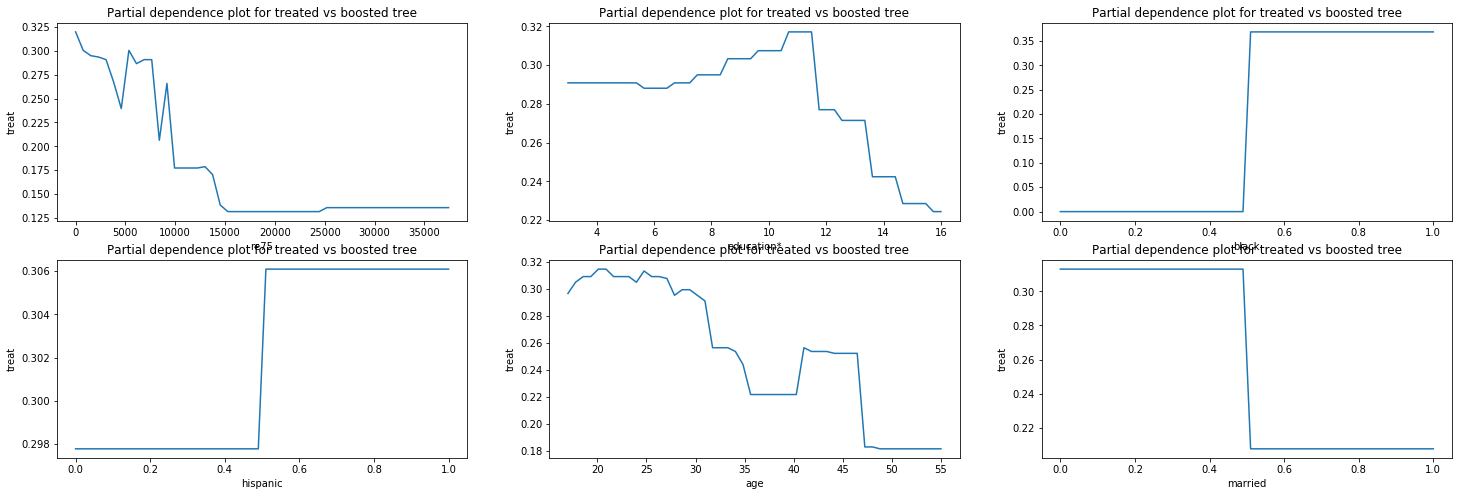

In [158]:

# NSW trial plots 
fig, ax = plt.subplots(nrows=2, ncols=3,figsize=(25,8))

# Boosted Tree
plot1 = pdp.partialDependPlot(ax[0,0])
plot2 = pdp2.partialDependPlot(ax[0,1])
plot3 = pdp3.partialDependPlot(ax[0,2])
plot4 = pdp4.partialDependPlot(ax[1,0])
plot5 = pdp5.partialDependPlot(ax[1,1])
plot6 = pdp6.partialDependPlot(ax[1,2])

plt.show()


# Decision tree explainer

In [ ]:
explainer.fitModel(tree.DecisionTreeClassifier(**boost_hyper_params))

In [ ]:
#forest_explainer = explainer(forest,dataset,features,target)
#tree_plot = forest_explainer.partialDependPlot(ax[0,0])

In [ ]:
# Function called fit model 
# def fitandRunModelfunct():
#  probabilities = model.predict_proba(dataset.drop('treat', axis=1))

plotting function
from sklearn import tree
import graphviz
tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=feature_names)
graphviz.Source(tree_graph)